In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import self-made module
import os, sys, pathlib
file_path = os.path.abspath('')
PROJECT_DIR = str(pathlib.Path(file_path).parent)
sys.path.append(PROJECT_DIR)
print(f"Added {PROJECT_DIR} to PATH")
from athena import *
from sympy.vector import CoordSys3D, gradient, curl

sp.init_printing()

# ult functions
def reset_symbols():
    global x, y, z, a, b, c, d, e, f, g, h, s, k, t, theta, lmda
    x, y, z = sp.symbols('x y z', real=True)
    a, b, c, d, e, f, g, h, s, k, t = sp.symbols('a b c d e f g h s k t', real=True)
    theta = sp.Symbol('theta')
    lmda = sp.Symbol('lambda')

reset_symbols()

Added D:\Dev\Code\MyMathLab to PATH


In [2]:
curve = sp.Curve((6*t, t), (t, -1, 1))
curve
sp.line_integrate(x**2, curve, [x, y])

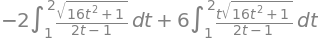

In [3]:
curve = sp.Curve((-t, 2*t**2), (t, 1, 2))
curve

f = (2*x + 3*y) / (x+y)
sp.line_integrate(f, curve, [x, y]).simplify()

In [4]:
curve = sp.Curve((sp.cos(t), sp.sin(t) - 1), (t, 0, 2*sp.pi))
curve

f = -y
sp.line_integrate(f, curve, [x, y]).simplify()

In [5]:
curve = sp.Curve((t, t), (t, 0, sp.pi))
curve

f = sp.sin(x) + sp.sin(y)
sp.line_integrate(f, curve, [x, y]).simplify()

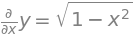

In [6]:
eq = sp.Eq(y, sp.sqrt(1 - x**2))
sp.Derivative(eq, x)

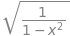

In [7]:
expr = sp.sqrt(1/(1-x**2))
expr
expr.integrate((x, -1, 1))

In [8]:
dy, dx = sp.symbols('dy dx')
f = sp.sin(x)
eq = sp.Eq(dy/dx, f.diff(*f.free_symbols))
dy = sp.solve(eq, dy)[0]
dy

expr = sp.sqrt(dx**2 + dy**2)
expr.simplify()

In [9]:
dy, dx = sp.symbols('dy dx')
f = y**2
eq = sp.Eq(dx/dy, f.diff(*f.free_symbols))
dx = sp.solve(eq, dx)[0]
dx

expr = sp.sqrt(dx**2 + dy**2)
expr.simplify()

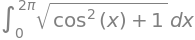

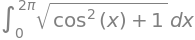

In [10]:
expr = sp.sqrt(1 + sp.sin(x).diff(x) ** 2)
expr
itg = expr.integrate((x, 0, sp.pi * 2))
itg
itg.doit()

In [11]:
expr = sp.sqrt(sp.cos(x) ** 2 + 1)
expr.subs({x:sp.pi*2})
expr.subs({x:0})

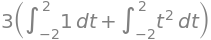

In [12]:
curve = sp.Curve((t**3-3*t, 3*t**2), (t, -2, 2))
curve
curve.length
curve.length.evalf()

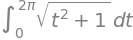

In [18]:
curve = sp.Curve((t*sp.cos(t), t*sp.sin(t)), (t, 0, 2*sp.pi))
curve
curve.length.simplify()

In [20]:
curve = sp.Curve((2*sp.cos(t), 2*sp.sin(t)), (t, 0, sp.pi/2))
curve

f = x + y
sp.line_integrate(f, curve, [x, y]).simplify()

In [27]:
r = sp.Matrix([2*sp.cos(t), 2*sp.sin(t)])

r_dt = r.diff(t)
r_dt

sp.sqrt(r_dt[0]**2 + r_dt[1]**2).simplify()

⎡-2⋅sin(t)⎤
⎢         ⎥
⎣2⋅cos(t) ⎦

⎡ 4   1 ⎤
⎢t  - ──⎥
⎢      2⎥
⎢     t ⎥
⎢       ⎥
⎣  2⋅t  ⎦

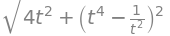

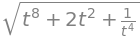

False

In [134]:
s = sp.Matrix( [1/t + sp.Rational(1, 5) * t**5, t**2])
s_dt = s.diff(t)
s_dt

s_dt_mag = sp.sqrt( s_dt[0] ** 2 + s_dt[1] ** 2)
s_dt_mag
s_dt_mag.expand()

expr1 = s_dt_mag.expand()
expr2 = t**4 + 1/t**2

expr1.equals(expr2)
expr2

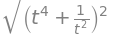

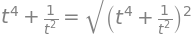

whether equals:


True


After expand(): 


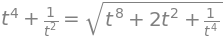

whether equals:


False

In [135]:
initial_expr = 1 / (t**2) + t**4
initial_expr

sq_sqrt_expr = sp.sqrt(initial_expr**2)
sq_sqrt_expr

eq1 = sp.Eq(initial_expr, sq_sqrt_expr)
eq1
print('whether equals:')
eq1.lhs.equals(eq1.rhs)

print('\nAfter expand(): ')
eq2 = sp.Eq(initial_expr, sq_sqrt_expr.expand())
eq2
print('whether equals:')
eq2.lhs.equals(eq2.rhs)

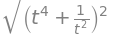

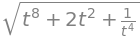

if equals = False


In [139]:
expr =  1 / (t**2) + t**4
expr

sq_sqrt_expr = sp.sqrt(initial_expr**2)
sq_sqrt_expr
sq_sqrt_expr.expand()

if_equal = sq_sqrt_expr.equals(sq_sqrt_expr.expand())
print(f"if equals = {if_equal}")

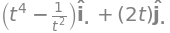

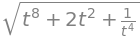

In [60]:
C = CoordSys3D('.')

s = (1/t + t**5/5)*C.i + (t**2)*C.j
s
s_prime = s.diff(t)
s_prime
s_prime.magnitude().expand()

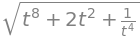

In [140]:
m = s_prime.to_matrix(C)

sp.sqrt(m[0]**2 + m[1]**2).expand()

In [42]:
s_prime.magnitude() == (1/t**2 + t**4)

False

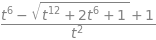

In [50]:
sp.simplify((1/t**2 + t**4) - s_prime.magnitude())

In [45]:
s_prime.magnitude().subs(t, 1)

In [141]:
curve = sp.Curve((1/t + t**5/5, t**2), (t, 1, 2))
curve

f = x*y**2
sp.line_integrate(f, curve, [x, y]).simplify()